# IMPORT PACKAGES

In [1]:
import pandas as pd

import pandas_datareader
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials

from pandas_datareader import data
from pandas.util.testing import assert_frame_equal
import matplotlib.pyplot as plt
%matplotlib inline

from nsepy import get_history
from datetime import date



# Yahoo Finance
One of the first sources from which you can get daily price-volume stock market data is Yahoo finance. You can use pandas_datareader or yfinance module to get the data.

# Advantages

Adjusted close price stock market data is available
Most recent stock market data is available
Doesn't require API key to fetch the stock market data

# Disadvantages

It is not a stable source to fetch the stock market data
If the stock market data fetching fails from yahoo finance using the pandas_datareader then you can use yfinance package to fetch the data.

In [2]:
# Set the start and end date
start_date = '1990-01-01'
end_date = '2019-02-01'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = data.get_data_yahoo(ticker, start_date, end_date)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000.0,1.958333
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000.0,1.729167
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800.0,1.708333
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200.0,1.635417
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200.0,1.427083


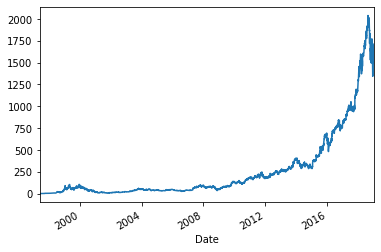

In [3]:
data['Adj Close'].plot()
plt.show()

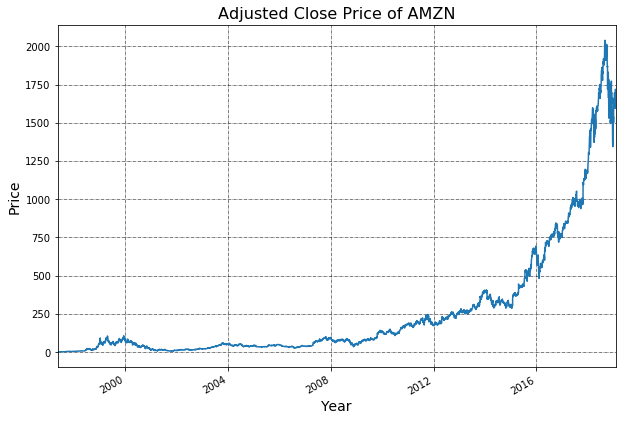

In [4]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

# QUANDL
Quandl has many data sources to get different types of data. However, some are free and some are paid. Wiki is the free data source of Quandl to get the data of the end of the day prices of 3000+ US equities.

It is curated by Quandl community and also provides information about the dividends and split.

To get the stock market data, you need to first install the quandl module if it is not already installed using the pip command as shown below.

In [5]:
QUANDL_API_KEY = 'VpYKj-e3pTXsUxQBMcto'

# Set the start and end date
start_date = '1990-01-01'
end_date = '2018-03-01'

# Set the ticker name
ticker = 'AMZN'

# Feth the data
data = quandl.get('WIKI/'+ticker, start_date=start_date,
                  end_date=end_date, api_key=QUANDL_API_KEY)

# Print the first 5 rows of the dataframe
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


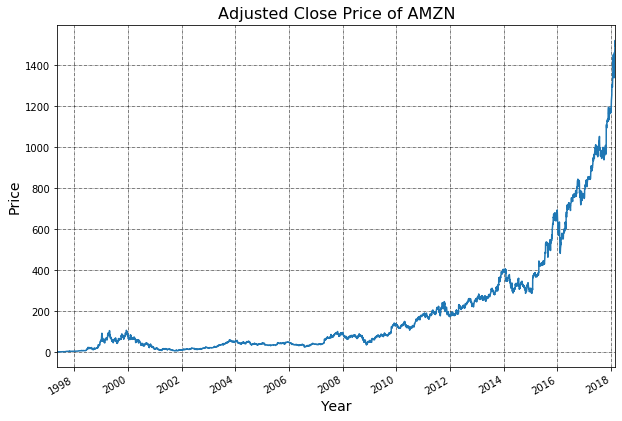

In [6]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the adjusted close price
data['Adj. Close'].plot()

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Get stock market data for multiple tickers
To get the stock market data of multiple stock tickers, you can create a list of tickers and call the quandl get method for each stock ticker.[1]

For simplicity, I have created a dataframe data to store the adjusted close price of the stocks.

In [7]:
# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Import pandas
data = pd.DataFrame(columns=tickers_list)

# Feth the data
for ticker in tickers_list:
    data[ticker] = quandl.get('WIKI/' + ticker, start_date=start_date,
                              end_date=end_date, api_key=QUANDL_API_KEY)['Adj. Close']

# Print first 5 rows of the data
data.head()

,AAPL,IBM,MSFT,WMT
Date,,,,
1990-01-02,1.118093,14.138144,0.410278,4.054211
1990-01-03,1.125597,14.263656,0.412590,4.054211
1990-01-04,1.129499,14.426678,0.424702,4.033561
1990-01-05,1.133101,14.390611,0.414300,3.990541
1990-01-08,1.140605,14.480057,0.420680,4.043886


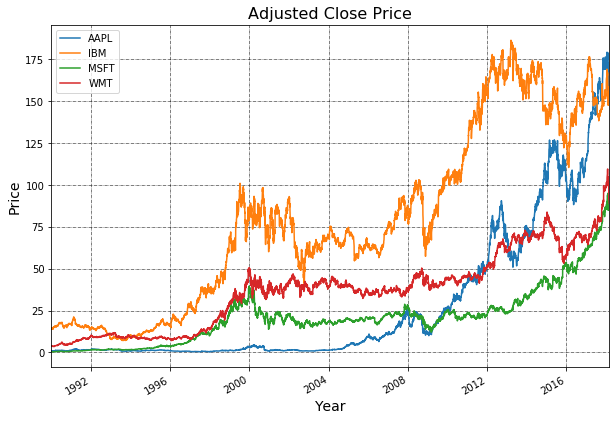

In [8]:
# Plot all the close prices
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Advantages

It is free of cost
Has split and dividend-adjusted stock market data

# Disadvantages

Only available till 27-March-2018

# Intraday Data

# Alpha Vantage
Alpha vantage is used to get the minute level stock market data. You need to signup on alpha vantage to get the free API key.


In [9]:
# Import TimeSeries class
from alpha_vantage.timeseries import TimeSeries
ALPHA_VANTAGE_API_KEY = '0R9QKMGY0T17LR42'

# Initialize the TimeSeries class with key and output format
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

# Get pandas dataframe with the intraday data and information of the data
data, data_info=ts.get_daily('GOOGL', outputsize ='compact')

# Print the information of the data
data_info

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2020-02-14',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [10]:
# Print the intraday data
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-02-14,1514.53,1520.05,1505.55,1518.73,1159857.0
2020-02-13,1510.00,1525.95,1504.00,1513.39,1145658.0
2020-02-12,1515.86,1520.30,1508.67,1518.63,1552136.0
2020-02-11,1513.27,1529.88,1505.45,1510.06,1742647.0
2020-02-10,1477.23,1508.88,1475.20,1508.66,1915072.0


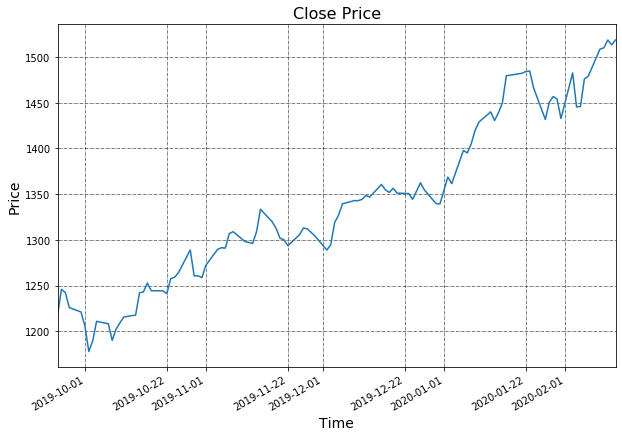

In [11]:
data['4. close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Get data at a custom frequency
During strategy modelling, you are required to work with a custom frequency of stock market data such as 7 minutes or 35 minutes. This custom frequency candles are not provided by data vendors or web sources.

In this case, you can use the pandas resample method to convert the stock market data to the frequency of your choice. The implementation of these is shown below where a 1-minute frequency data is converted to 10-minute frequency data.

The first step is to define the dictionary with the conversion logic. For example, to get the open value the first value will be used, to get the high value the maximum value will be used and so on.

# Convert the index to datetime timestamp 

By default string is returned. Then call the resample method with the frequency such as

10T for 10 minutes,
D for 1 day and
M for 1 month

In [12]:
ohlcv_dict = {
 '1. open': 'first',
 '2. high': 'max',
 '3. low': 'min',
 '4. close': 'last',
 '5. volume': 'sum'
}

In [13]:
data.index = pd.to_datetime(data.index)
data_10 = data.resample('10T').agg(ohlcv_dict)
data_10.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-09-24 00:00:00,1240.0,1247.11,1210.64,1218.33,1835712.0
2019-09-24 00:10:00,NaN,NaN,NaN,NaN,0.0
2019-09-24 00:20:00,NaN,NaN,NaN,NaN,0.0
2019-09-24 00:30:00,NaN,NaN,NaN,NaN,0.0
2019-09-24 00:40:00,NaN,NaN,NaN,NaN,0.0


# yfinance
yfinance is another module which can be used to fetch the minute level stock market data. It returns the stock market data for the last 7 days.


The yfinance module has the download method which can be used to download the stock market data. It takes the following parameters:
______________________________________________________________________________________________________________________________

* ticker: The name of the tickers you want the data for. 
If you want data for multiple tickers then separate them by space

* period: The number of days/month of data required. 
The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

* interval: The frequency of data. 
The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

* The below code fetches the stock market data for MSFT for the past 5 days of 1-minute frequency.

# Featured Methods
* get_financial_stmts(frequency, statement_type, reformat=True)
    * frequency can be either ‘annual’ or ‘quarterly’.
    * statement_type can be ‘income’, ‘balance’, ‘cash’ or a list of several.
    * reformat optional value defaulted to true. Enter False for unprocessed raw data from Yahoo Finance.
* get_stock_price_data(reformat=True)
    * reformat optional value defaulted to true. Enter False for unprocessed raw data from Yahoo Finance.
* get_stock_earnings_data(reformat=True)
    * reformat optional value defaulted to true. Enter False for unprocessed raw data from Yahoo Finance.
* get_summary_data(reformat=True)
    * Returns financial summary data for cryptocurrencies, stocks, currencies, ETFs, mutual funds, U.S. Treasuries, commodity futures, and indexes.
    * reformat optional value defaulted to true. Enter False for unprocessed raw data from Yahoo Finance.
* get_stock_quote_type_data()
* get_historical_price_data(start_date, end_date, time_interval)
    * This method will pull historical pricing data for stocks, currencies, ETFs, mutual funds, U.S. Treasuries, cryptocurrencies, commodities, and indexes.
    * start_date should be entered in the ‘YYYY-MM-DD’ format and is the first day that data will be pulled for.
    * end_date should be entered in the ‘YYYY-MM-DD’ format and is the last day that data will be pulled for.
    * time_interval can be either ‘daily’, ‘weekly’, or ‘monthly’. This variable determines the time period interval for your pull.
    * Data response includes relevant pricing event data such as dividends and stock splits.
* get_num_shares_outstanding(price_type=’current’)
    * price_type can also be set to ‘average’ to calculate the shares outstanding with the daily average price.


# Methods Added in V1.5
* get_daily_dividend_data(start_date, end_date)

# Additional Module Methods
* get_interest_expense()
* get_operating_income()
* get_total_operating_expense()
* get_total_revenue()
* get_cost_of_revenue()
* get_income_before_tax()
* get_income_tax_expense()
* get_gross_profit()
* get_net_income_from_continuing_ops()
* get_research_and_development()
* get_current_price()
* get_current_change()
* get_current_percent_change()
* get_current_volume()
* get_prev_close_price()
* get_open_price()
* get_ten_day_avg_daily_volume()
* get_three_month_avg_daily_volume()
* get_stock_exchange()
* get_market_cap()
* get_daily_low()
* get_daily_high()
* get_currency()
* get_yearly_high()
* get_yearly_low()
* get_dividend_yield()
* get_annual_avg_div_yield()
* get_five_yr_avg_div_yield()
* get_dividend_rate()
* get_annual_avg_div_rate()
* get_50day_moving_avg()
* get_200day_moving_avg()
* get_beta()
* get_payout_ratio()
* get_pe_ratio()
* get_price_to_sales()
* get_exdividend_date()
* get_book_value()
* get_ebit()
* get_net_income()
* get_earnings_per_share()
* get_key_statistics_data()

In [14]:
ydata = yf.download(tickers="MSFT",
 period="5d",
 interval="1m")
ydata.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-02-10 09:30:00-05:00,183.570007,183.979996,183.250000,183.642502,183.642502,913904
2020-02-10 09:31:00-05:00,183.645004,183.800003,183.600006,183.750107,183.750107,93151
2020-02-10 09:32:00-05:00,183.770004,184.044998,183.759995,183.925003,183.925003,193845
2020-02-10 09:33:00-05:00,183.929993,183.929993,183.450104,183.570007,183.570007,137638
2020-02-10 09:34:00-05:00,183.740005,183.740005,183.740005,183.740005,183.740005,126186


# Stocks Fundamental Data

* We have used yfinance to get the fundamental data.

* The first step is to set the ticker and then call the appropriate properties to get the right stock market data.

In [15]:
# Set the ticker as MSFT
!pip install yfinance

# Import yfinance
import yfinance as yf

# Set the ticker as MSFT
y_finance = yf.Ticker("MSFT")


#yticker='MSFT'
#y_finance=yf.Ticker(yticker)

# Key Ratios
You can fetch the latest price to book ratio and price to earnings ratio as shown below.

In [16]:
# get price to book
pb = y_finance.info['priceToBook']
pe = y_finance.info['regularMarketPrice']/y_finance.info['trailingEps']

print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)
print('')

#or
ptb=y_finance.info['priceToBook']
print(ptb)


Price to Book Ratio is: 12.81
Price to Earnings Ratio is: 31.92

12.811917


In [17]:
# show revenues

revenue = y_finance.info['enterpriseToRevenue']

revenue

#plt.bar(revenue.index, revenue.values)
#plt.ylabel("Total Revenues")
#plt.show()

10.151

In [18]:
# Earnings Before Interest and Taxes

EBIT = y_finance.info['enterpriseToEbitda']

EBIT

#plt.bar(EBIT,'years')
#plt.ylabel("EBIT")
#plt.show()

22.243

In [19]:
# show income statement
y_finance.financials

# show balance heet
y_finance.balance_sheet

# show cashflow
y_finance.cashflow

# show other info
y_finance.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft 

* {'zip': '98052',
* 'sector': 'Technology',
* 'fullTimeEmployees': 144000,
* 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification to developers and IT professionals on various Microsoft products. The company's More Personal Computing segment offers Windows OEM licensing and other non-volume licensing of the Windows operating system; Windows Commercial comprising volume licensing of the Windows operating system, Windows cloud services, and other Windows commercial offerings; patent licensing; Windows Internet of Things; and MSN advertising. It also provides Microsoft Surface, PC accessories, and other intelligent devices; Gaming, including Xbox hardware, and Xbox software and services; video games and third-party video game royalties; and Search, including Bing and Microsoft advertising. The company sells its products through distributors and resellers; and directly through digital marketplaces, online stores, and retail stores. It has strategic partnerships with Humana Inc. and Nokia. The company was founded in 1975 and is headquartered in Redmond, Washington.",

* 'city': 'Redmond',
* 'phone': '425-882-8080',
* 'state': 'WA',
*  'country': 'United States',
 * 'companyOfficers': [],
 * 'website': 'http://www.microsoft.com',
 * 'maxAge': 1,
 * 'address1': 'One Microsoft Way',
 * 'fax': '425-706-7329',
 * 'industry': 'Software—Infrastructure',
 * 'previousClose': 183.63,
 * 'regularMarketOpen': 182.845,
 * 'twoHundredDayAverage': 147.40741,
 * 'trailingAnnualDividendYield': 0.010564722,
 * 'payoutRatio': 0.32930002,
 * 'volume24Hr': None,
 * 'regularMarketDayHigh': 185.63,
 * 'navPrice': None,
*  'averageDailyVolume10Day': 36191300,
 * 'totalAssets': None,
 * 'regularMarketPreviousClose': 183.63,
 * 'fiftyDayAverage': 165.18242,
 * 'trailingAnnualDividendRate': 1.94,
 * 'open': 182.845,
 * 'averageVolume10days': 36191300,
 * 'expireDate': None,
 * 'yield': None,
 * 'algorithm': None,
 * 'dividendRate': 2.04,
 * 'exDividendDate': 1582070400,
 * 'beta': 1.154593,
 * 'circulatingSupply': None,
 * 'startDate': None,
 * 'regularMarketDayLow': 182.48,
 * 'priceHint': 2,
 * 'currency': 'USD',
 * 'trailingPE': 32.031006,
 * 'regularMarketVolume': 33529074,
 * 'lastMarket': None,
 * 'maxSupply': None,
 * 'openInterest': None,
 * 'marketCap': 1427675938816,
 * 'volumeAllCurrencies': None,
 * 'strikePrice': None,
 * 'averageVolume': 23638511,
 * 'priceToSalesTrailing12Months': 10.634537,
 * 'dayLow': 182.48,
 * 'ask': 183.6,
 * 'ytdReturn': None,
 * 'askSize': 1200,
 * 'volume': 33529074,
 * 'fiftyTwoWeekHigh': 185.63,
 * 'forwardPE': 29.142632,
 * 'fromCurrency': None,
 * 'fiveYearAvgDividendYield': 2.02,
 * 'fiftyTwoWeekLow': 104.97,
 * 'bid': 183.63,
 * 'tradeable': True,
 * 'dividendYield': 0.0111,
 * 'bidSize': 1000,
 * 'dayHigh': 185.63,
 * 'exchange': 'NMS',
 * 'shortName': 'Microsoft Corporation',
 * 'longName': 'Microsoft Corporation',
 * 'exchangeTimezoneName': 'America/New_York',
 * 'exchangeTimezoneShortName': 'EST',
 * 'isEsgPopulated': False,
 * 'gmtOffSetMilliseconds': '-18000000',
 * 'quoteType': 'EQUITY',
 * 'symbol': 'MSFT',
 * 'messageBoardId': 'finmb_21835',
 * 'market': 'us_market',
 * 'annualHoldingsTurnover': None,
 * 'enterpriseToRevenue': 10.068,
 * 'beta3Year': None,
 * 'profitMargins': 0.33016,
 * 'enterpriseToEbitda': 22.061,
 * '52WeekChange': 0.7447032,
 * 'morningStarRiskRating': None,
 * 'forwardEps': 6.31,
 * 'revenueQuarterlyGrowth': None,
 * 'sharesOutstanding': 7606049792,
 * 'fundInceptionDate': None,
 * 'annualReportExpenseRatio': None,
 * 'bookValue': 14.467,
 * 'sharesShort': 63639312,
 * 'sharesPercentSharesOut': 0.0084,
 * 'fundFamily': None,
 * 'lastFiscalYearEnd': 1561852800,
 * 'heldPercentInstitutions': 0.74906,
 * 'netIncomeToCommon': 44323000320,
 * 'trailingEps': 5.741,
 * 'lastDividendValue': None,
 * 'SandP52WeekChange': 0.23469627,
 * 'priceToBook': 12.710998,
 * 'heldPercentInsiders': 0.0141900005,
 * 'nextFiscalYearEnd': 1625011200,
 * 'mostRecentQuarter': 1577750400,
 * 'shortRatio': 2.85,
 * 'sharesShortPreviousMonthDate': 1576195200,
 * 'floatShares': 7494922663,
 * 'enterpriseValue': 1351591919616,
 * 'threeYearAverageReturn': None,
 * 'lastSplitDate': 1045526400,
 * 'lastSplitFactor': '2:1',
 * 'legalType': None,
 * 'morningStarOverallRating': None,
 * 'earningsQuarterlyGrowth': 0.383,
 * 'dateShortInterest': 1579046400,
 * 'pegRatio': 2.21,
 * 'lastCapGain': None,
 * 'shortPercentOfFloat': 0.0084,
 * 'sharesShortPriorMonth': 63934516,
 * 'category': None,
 * 'fiveYearAverageReturn': None,
 * 'regularMarketPrice': 182.845,
 * 'logo_url': 'https://logo.clearbit.com/microsoft.com'}

# Futures and Options (F&O) Data for Indian Equities
NSEpy
The nsepy package is used to get the stock market data for the futures and options for Indian stocks and indices.

# Futures Data

In [ ]:
#from datetime import date
#from nsepy import get_history

# Stock options (for index options, set index = True)
#stock_fut = get_history(symbol="HDFC",
#                        start=date(2019, 1, 15),
 #                       end=date(2019, 2, 1),
  #                      futures=True,
   #                     expiry_date=date(2019, 2, 28))

#stock_fut.head()

In [ ]:
#stock_fut.Close.plot(figsize=(10, 5))

# Define the label for the title of the figure
#plt.title("Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
#plt.ylabel('Price', fontsize=14)
#plt.xlabel('Date', fontsize=14)

# Plot the grid lines
#plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#plt.show()

# Options Data

In [ ]:
#stock_opt = get_history(symbol="HDFC",
#                        start=date(2019, 1, 15),
 #                       end=date(2019, 2, 1),
  #                      option_type="CE",
   #                     strike_price=2000,
    #                    expiry_date=date(2019, 2, 28))

#stock_opt.head()

In [ ]:
#import matplotlib.pyplot as plt

#stock_opt.Close.plot(figsize=(10, 5))

# Define the label for the title of the figure
#plt.title("Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
#plt.ylabel('Price', fontsize=14)
#plt.xlabel('Date', fontsize=14)

# Plot the grid lines
#plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#plt.show()